<a href="https://colab.research.google.com/github/deepakpracheta/Supervised-ML-Regression-Appliances-Energy-Prediction/blob/main/Supervised_ML_Appliances_Energy_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Data-driven prediction of energy use of appliances


The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions
were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the
temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for
10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters.
Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded
from a public data set from Reliable Prognosis (rp5.ru) and merged together with the
experimental data sets using the date and time column. Two random variables have been
included in the data set for testing the regression models and to filter out non-predictive attributes
(parameters).


In [1]:
#installing package
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 4.0 MB/s 


# Importing Relevant Libraries

In [2]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

In [24]:
#importing dataset
path='/content/drive/MyDrive/Capstone Projects/Supervised ML-Regression Appliances Energy Prediction/data_application_energy.csv'
df=pd.read_csv(path)


In [25]:
df.head().T

,0,1,2,3,4
date,2016-01-11 17:00:00,2016-01-11 17:10:00,2016-01-11 17:20:00,2016-01-11 17:30:00,2016-01-11 17:40:00
Appliances,60,60,50,50,60
lights,30,30,30,40,40
T1,19.89,19.89,19.89,19.89,19.89
RH_1,47.596667,46.693333,46.3,46.066667,46.333333
T2,19.2,19.2,19.2,19.2,19.2
RH_2,44.79,44.7225,44.626667,44.59,44.53
T3,19.79,19.79,19.79,19.79,19.79
RH_3,44.73,44.79,44.933333,45.0,45.0
T4,19.0,19.0,18.926667,18.89,18.89


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

**In our dataset all columns are numerical type except date column which is of date-time format.**

**Target Variable is Appliances** 

In [27]:
df.shape

(19735, 29)

In our dataset there are 29 columns and 19735 rows.

In [28]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


There is none catergorical column in the dataset.

There is no null or missing values.

Max Energy consumption is 1080 and min is 10.

Light Columns has majority of values as 0.

Average temperature outside is about 7.5 degrees. While it ranges from -6 to 28 degress.

Average humidity outside is higher than average humidity inside.


In [29]:
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [30]:
df.corr()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
Appliances,1.000000,0.197278,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.016965,...,0.010010,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.000230,0.015353,-0.011145,-0.011145
lights,0.197278,1.000000,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161,-0.008859,0.114936,...,-0.157592,-0.008766,-0.074424,-0.010576,0.068543,0.060281,0.020038,-0.036322,0.000521,0.000521
T1,0.055447,-0.023528,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,...,0.844777,0.071756,0.682846,-0.150574,-0.345481,-0.087654,-0.076210,0.571309,-0.006203,-0.006203
RH_1,0.086031,0.106968,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,...,0.115263,0.764001,0.340767,-0.293957,0.274126,0.204932,-0.021057,0.639106,-0.000699,-0.000699
T2,0.120073,-0.005622,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,...,0.675535,0.157346,0.792255,-0.133028,-0.505291,0.052495,-0.069721,0.582602,-0.011087,-0.011087
RH_2,-0.060465,0.050985,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,...,0.054544,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.005368,0.499152,0.006275,0.006275
T3,0.085060,-0.097393,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,...,0.901324,0.134602,0.699417,-0.189974,-0.281718,-0.100776,-0.102310,0.645886,-0.005194,-0.005194
RH_3,0.036292,0.131161,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,...,-0.195270,0.833538,0.118207,-0.233274,0.356192,0.263188,0.017041,0.414387,-0.000477,-0.000477
T4,0.040281,-0.008859,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,...,0.889439,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,-0.104768,0.519471,-0.001815,-0.001815
RH_4,0.016965,0.114936,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,...,-0.044518,0.856591,0.293289,-0.250748,0.336813,0.300192,0.002636,0.616509,-0.001787,-0.001787


## Columns Information



1.  Date time year-month-day hour:minute:second
2.  Appliances, energy use in Wh
3.  Lights, energy use of light fixtures in the house in Wh
4.  T1, Temperature in kitchen area, in Celsius
5.  RH_1, Humidity in kitchen area, in %
6.  T2, Temperature in living room area, in Celsius
7.  RH_2, Humidity in living room area, in %
8.  T3, Temperature in laundry room area
9.  RH_3, Humidity in laundry room area, in %
10. T4, Temperature in office room, in Celsius
11. RH_4, Humidity in office room, in %
12. T5, Temperature in bathroom, in Celsius
13. RH_5, Humidity in bathroom, in %
14. T6, Temperature outside the building (north side), in Celsius
15. RH_6, Humidity outside the building (north side), in %
16. T7, Temperature in ironing room , in Celsius
17. RH_7, Humidity in ironing room, in %
18. T8, Temperature in teenager room 2, in Celsius
19. RH_8, Humidity in teenager room 2, in %
20. T9, Temperature in parents room, in Celsius
21. RH_9, Humidity in parents room, in %
22. To, Temperature outside (from Chievres weather station), in Celsius
23. Pressure (from Chievres weather station), in mm Hg
24. RH_out, Humidity outside (from Chievres weather station), in %
25. Wind speed (from Chievres weather station), in m/s
26. Visibility (from Chievres weather station), in km
27. Tdewpoint (from Chievres weather station), Â°C
28. rv1, Random variable 1, nondimensional
29. rv2, Random variable 2, nondimensional

In [31]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [32]:
missing_cols = df.isnull().mean()

In [33]:
missing_cols.sort_values(ascending=False)

date           0.0
T7             0.0
rv1            0.0
Tdewpoint      0.0
Visibility     0.0
Windspeed      0.0
RH_out         0.0
Press_mm_hg    0.0
T_out          0.0
RH_9           0.0
T9             0.0
RH_8           0.0
T8             0.0
RH_7           0.0
RH_6           0.0
Appliances     0.0
T6             0.0
RH_5           0.0
T5             0.0
RH_4           0.0
T4             0.0
RH_3           0.0
T3             0.0
RH_2           0.0
T2             0.0
RH_1           0.0
T1             0.0
lights         0.0
rv2            0.0
dtype: float64

In [18]:
# Divide the columns based on type

col_hum = ['RH_1', 'RH_2', 'RH_3', 'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9']
col_temp = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9']

col_weather = ['T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']

col_randoms = ["rv1", "rv2"]

In [34]:
# Quick look at humidity values

df[col_hum].describe()

,RH_1,RH_2,RH_3,RH_4,RH_5,RH_6,RH_7,RH_8,RH_9
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,40.259739,40.420420,39.242500,39.026904,50.949283,54.609083,35.388200,42.936165,41.552401
std,3.979299,4.069813,3.254576,4.341321,9.022034,31.149806,5.114208,5.224361,4.151497
min,27.023333,20.463333,28.766667,27.660000,29.815000,1.000000,23.200000,29.600000,29.166667
25%,37.333333,37.900000,36.900000,35.530000,45.400000,30.025000,31.500000,39.066667,38.500000
50%,39.656667,40.500000,38.530000,38.400000,49.090000,55.290000,34.863333,42.375000,40.900000
75%,43.066667,43.260000,41.760000,42.156667,53.663333,83.226667,39.000000,46.536000,44.338095
max,63.360000,56.026667,50.163333,51.090000,96.321667,99.900000,51.400000,58.780000,53.326667




*   We see that the humidity inside the house is similar in various rooms of the house.
*   RH_6 - humidity in the bathroom - since the bathroom is not always in use, it is reasonable to see a high variance. When the bathroom is in use, we would see high humidity and vice versa.
*  RH_5 - humidty outside the house - this is measured by the sensor. Humidity outside the house will have different values than inside the house.

In [35]:
# Quick look at temperature values

df[col_temp].describe()


,T1,T2,T3,T4,T5,T6,T7,T8,T9
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,21.686571,20.341219,22.267611,20.855335,19.592106,7.910939,20.267106,22.029107,19.485828
std,1.606066,2.192974,2.006111,2.042884,1.844623,6.090347,2.109993,1.956162,2.014712
min,16.790000,16.100000,17.200000,15.100000,15.330000,-6.065000,15.390000,16.306667,14.890000
25%,20.760000,18.790000,20.790000,19.530000,18.277500,3.626667,18.700000,20.790000,18.000000
50%,21.600000,20.000000,22.100000,20.666667,19.390000,7.300000,20.033333,22.100000,19.390000
75%,22.600000,21.500000,23.290000,22.100000,20.619643,11.256000,21.600000,23.390000,20.600000
max,26.260000,29.856667,29.236000,26.200000,25.795000,28.290000,26.000000,27.230000,24.500000




*   Distribution of temperature values is similar across different rooms.
*  T5 - temperature outside is also similar to the inside temperature.
*  T6 - temperature inside bathroom has high variance as temperature will vary a lot depending on usage or non usage




In [36]:
# Quick look at weather data collected from the weather station

df[col_weather].describe()

,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707
std,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648
min,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000
25%,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000
50%,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333
75%,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667
max,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000


In [37]:
# Quick look at the dependant variable

df[['Appliances']].describe()

,Appliances
count,19735.000000
mean,97.694958
std,102.524891
min,10.000000
25%,50.000000
50%,60.000000
75%,100.000000
max,1080.000000


In [38]:
# Quick look at the lights column

df[['lights']].describe()

,lights
count,19735.000000
mean,3.801875
std,7.935988
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,70.000000


**Exploratory Data Analysis**

**Distribution of our appliances energy usage :**

In [39]:
df.Appliances.describe()

count    19735.000000
mean        97.694958
std        102.524891
min         10.000000
25%         50.000000
50%         60.000000
75%        100.000000
max       1080.000000
Name: Appliances, dtype: float64

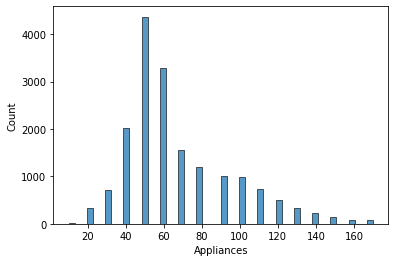

In [ ]:
sns.histplot(df['Appliances'],bins=50)

**75% of the time Appliances consumed less than 100 Wh, With the maximun consumption of 1080 Wh. Also there are small no instances where consumption is on higherside.**

Dependent Variable - Appliances

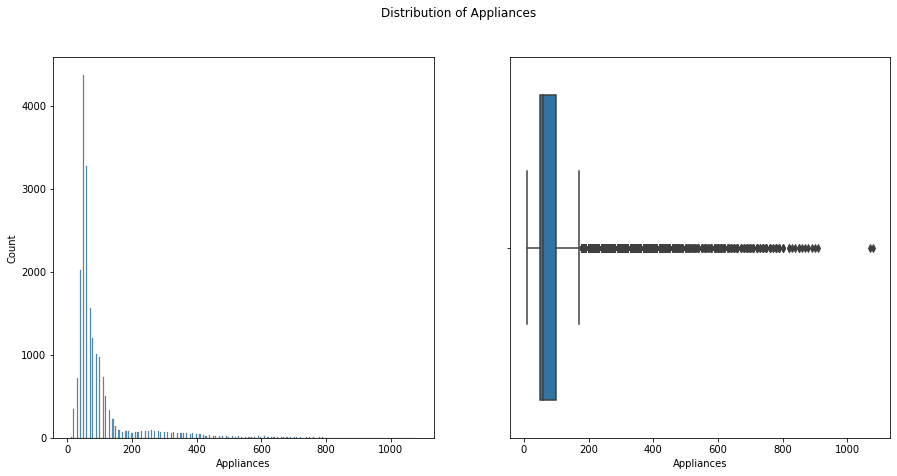

In [40]:
f, axes = plt.subplots(1, 2, figsize=(15,7))

f.suptitle('Distribution of Appliances')
sns.histplot(data=df, x='Appliances', ax=axes[0])
sns.boxplot(data=df, x='Appliances', ax=axes[1])

plt.show()

Distribution is highly right skewed. Also, we can see there are outliers.

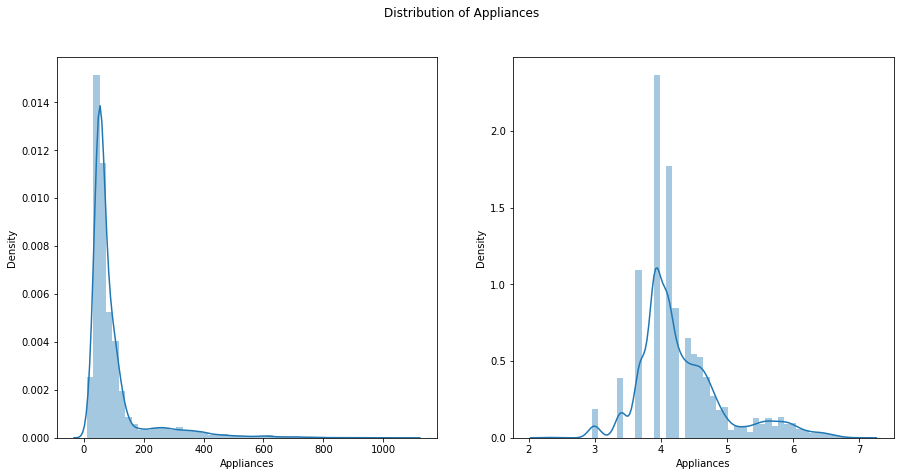

In [41]:
# Using log transformation to treat the skewness

f, axes = plt.subplots(1, 2, figsize=(15,7))

f.suptitle('Distribution of Appliances')
sns.distplot(df['Appliances'], hist=True, ax=axes[0])
sns.distplot(np.log(df['Appliances']), hist=True, ax=axes[1])

plt.show()

In [42]:
df.lights.value_counts()

0     15252
10     2212
20     1624
30      559
40       77
50        9
70        1
60        1
Name: lights, dtype: int64

**As it is evident from the data that most of the values in light column is 0. So it wont be playing much role in our model.**

**So It is better to drop this feature/column.** 

In [ ]:
df.drop('lights', axis=1, inplace = True)

**Humidity**

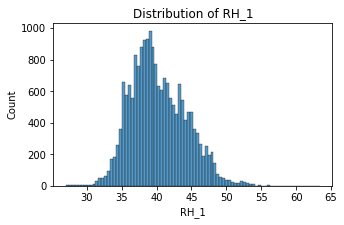

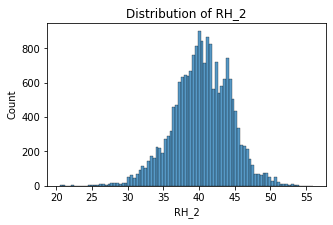

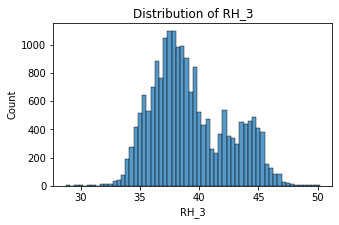

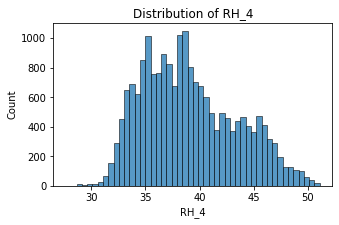

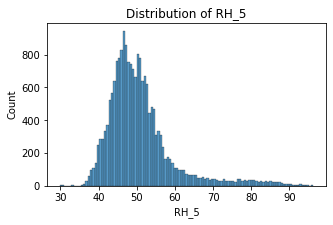

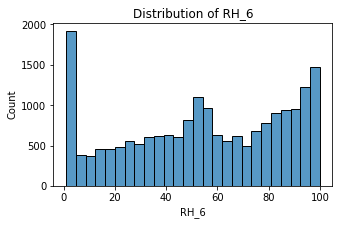

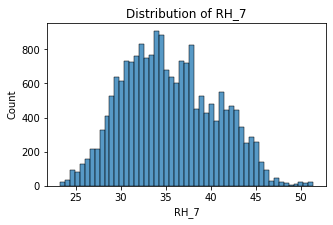

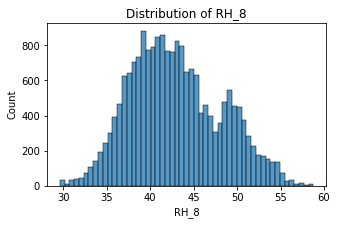

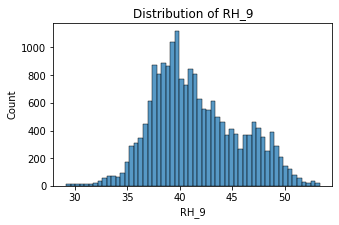

In [43]:
for i, ii in enumerate(df[col_hum]):
  plt.figure(figsize = (5,3))
  sns.histplot(data=df, x=ii)
  plt.title(f'Distribution of {ii}')
  plt.show()

**Temperature**

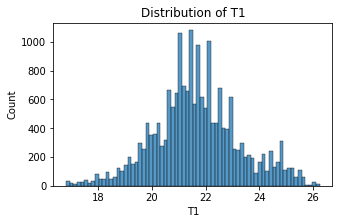

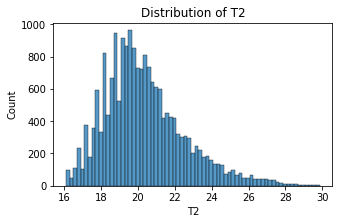

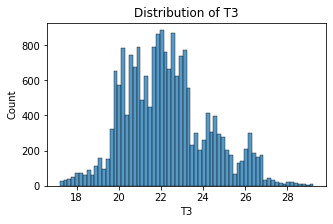

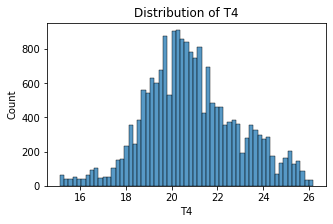

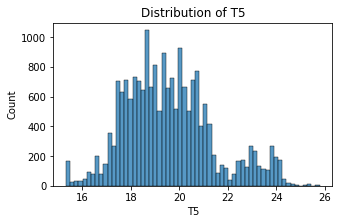

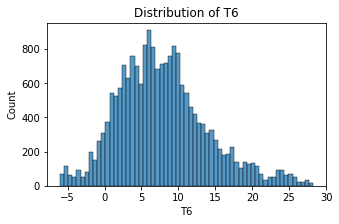

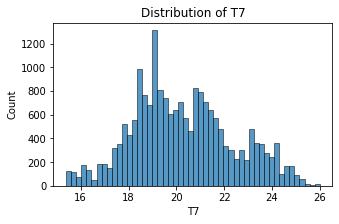

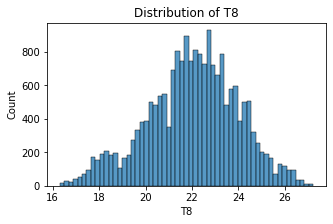

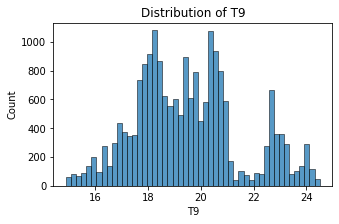

In [44]:
for i, ii in enumerate(df[col_temp]):
  plt.figure(figsize = (5,3))
  sns.histplot(data=df, x=ii)
  plt.title(f'Distribution of {ii}')
  plt.show()

**OutSide Weather**

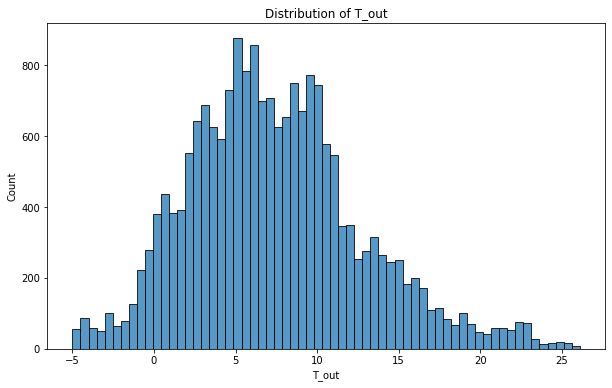

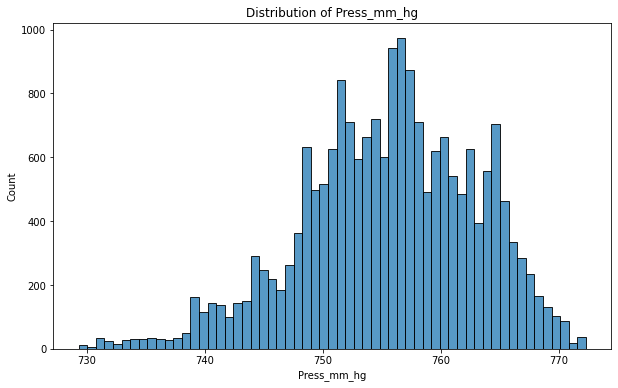

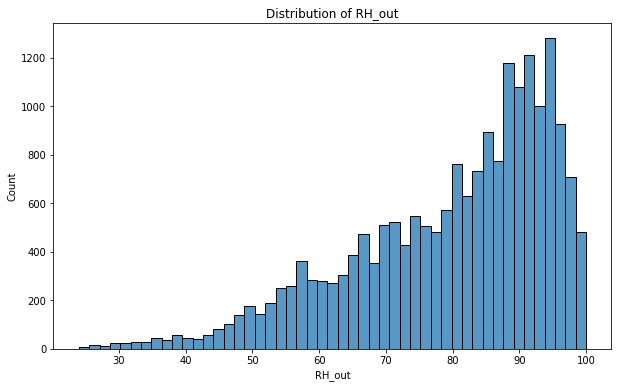

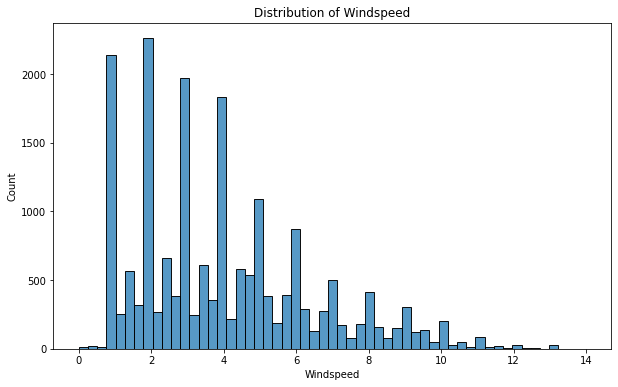

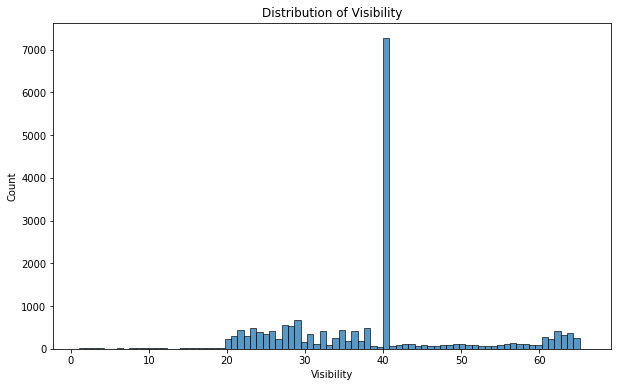

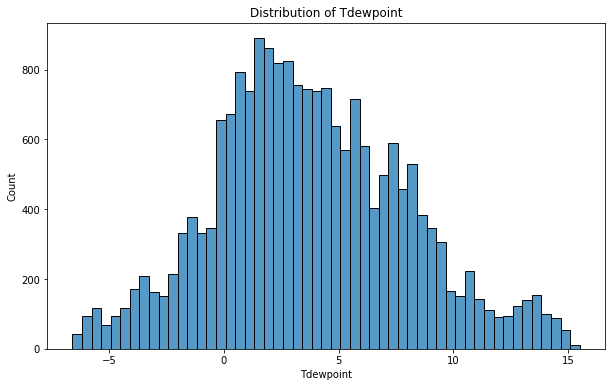

In [45]:
for i, ii in enumerate(df[col_weather]):
  plt.figure(figsize = (10,6))
  sns.histplot(data=df, x=ii)
  plt.title(f'Distribution of {ii}')
  plt.show()

**Correlation Plot**

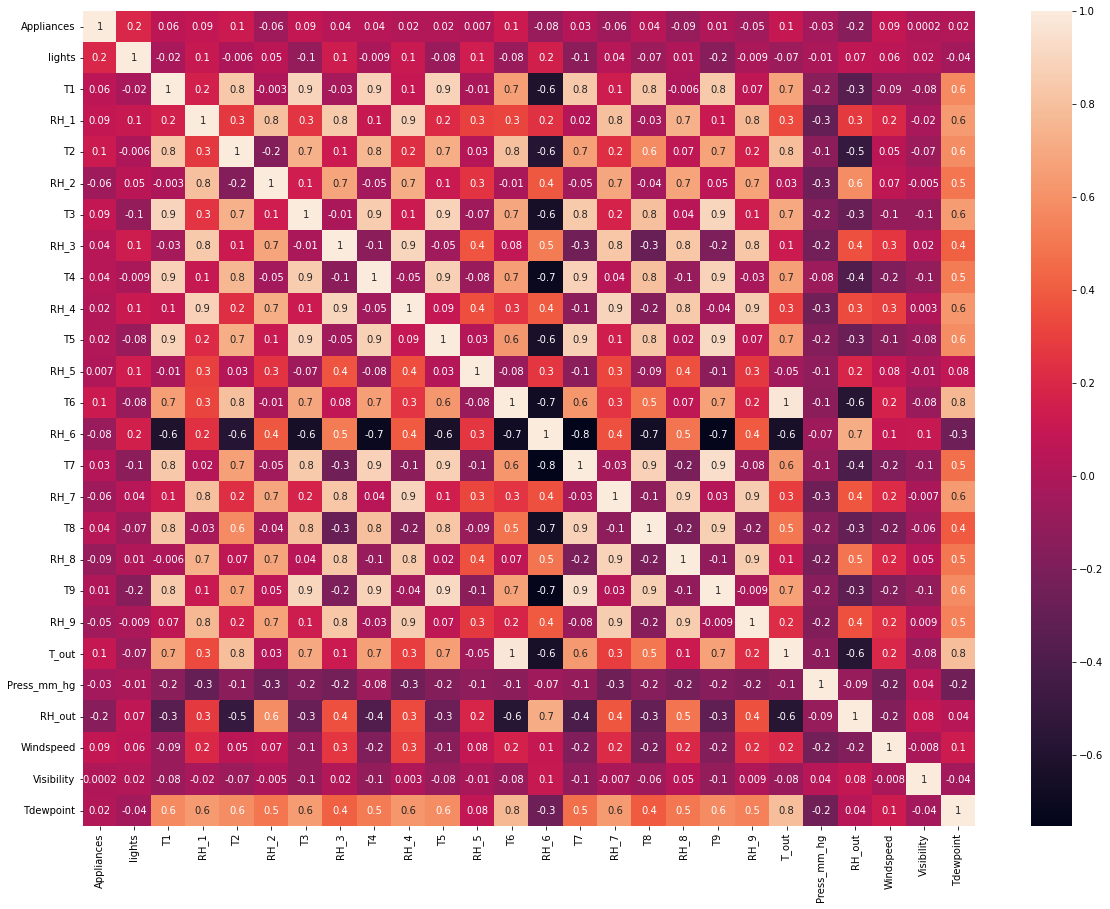

In [46]:
plt.figure(figsize = (20,15))
sns.heatmap(df.iloc[:, :-2].corr(), annot = True, fmt='.1g')
plt.show()



*  None of the variables are highly correlated with the target variable.
*  Correlations between indoor temperature and humidity is high as expected.
*  T_out and T6 have a correlation of 1 - both are the outside temperatures. Hence we need not consider both the variables.
*  Similary RH_out and RH_6 are outside humidity. Hence they have a high positive correlation of 0.7.
*  RH_6 has a negative correlation with the indoor temperatures and also outdoor temperature. This is expected as temperature and relative humidity are expected to be inversely proportional.



**Converting dates column to month,days and hour**

In [47]:
df['dates']=pd.to_datetime(df['date'])
df['months']=df['dates'].dt.month
df['hour']=df['dates'].dt.hour
df['day'] = df['dates'].dt.dayofweek

In [48]:
df.shape

(19735, 33)

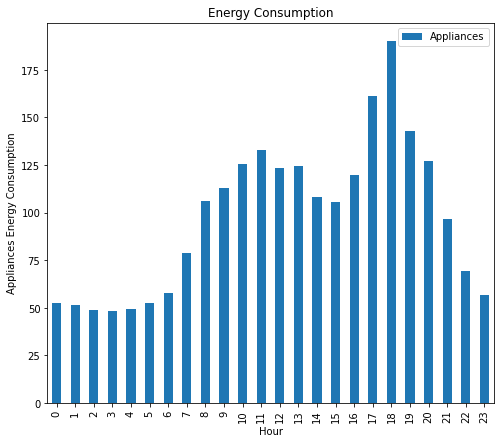

In [49]:
x= df.groupby('hour').agg({'Appliances' : 'mean'})
x.plot(kind='bar', title='Energy Consumption', ylabel='Appliances Energy Consumption',
         xlabel='Hour', figsize=(8, 7))

Above chart show the average distribution of energy consumed throughout the day for 4.5 months. We can clearly see that there are two peaks one at 11:00 AM which is shallow and low and the other one at 06:00 PM in the evening which is sharper as well as higher. 

During sleeping hours (10:00PM to 06:00AM) energy consumption is less about 50 Wh.  After about 6 AM, energy consumption starts to rise gradually up until 11 AM (probably due to morning chores). And then gradually decreases to around 100 Wh at about 3 PM. After which the energy consumption drastically shoots up up until 6 PM in the evening (probably due to requirement lights in rooms). However energy consumption of appliances reverts back to 50 Wh, as night approaches and people in the house go to bed at around 10 PM.

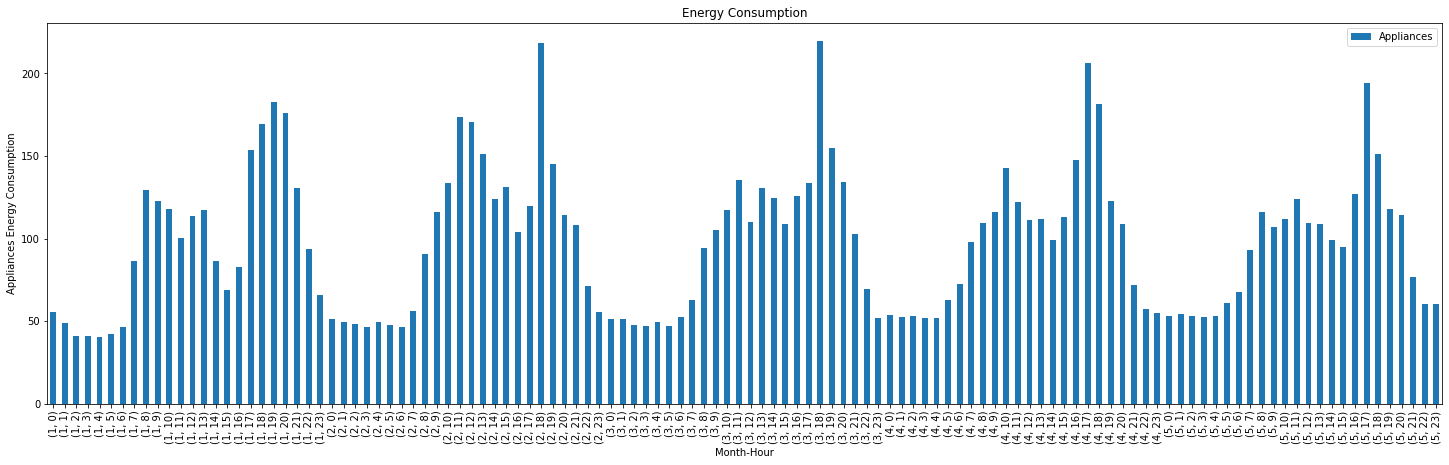

In [50]:
df.groupby(['months','hour']).agg({'Appliances' : 'mean'}).plot(kind='bar', title='Energy Consumption', ylabel='Appliances Energy Consumption',xlabel='Month-Hour', figsize=(25, 7))

In [52]:
df.drop(['T9',"RH_4",'RH_5','months','Visibility','Tdewpoint','dates','rv1','rv2','lights'], axis =1, inplace = True)

In [53]:
df.drop(['date'], axis =1, inplace = True)

**Removing Outliers**

In [54]:
#checking the outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

Appliances     2138
T1              515
RH_1            146
T2              546
RH_2            235
T3              217
RH_3             15
T4              186
T5              179
T6              515
RH_6              0
T7                2
RH_7             42
T8               71
RH_8             17
RH_9             21
T_out           436
Press_mm_hg     219
RH_out          239
Windspeed       214
hour              0
day               0
dtype: int64

In [55]:
#Replacing outliers 
for i  in df.columns:
  if(i!=('Appliances')):
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1

    df=df[(df[i]<(Q3 + 1.5 * IQR))]
    df=df[(df[i]>(Q1 - 1.5 * IQR))] 

In [56]:
#checking the outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

Appliances     1747
T1              170
RH_1             34
T2              128
RH_2             59
T3               76
RH_3             47
T4               53
T5               52
T6                4
RH_6              0
T7                0
RH_7              2
T8                0
RH_8             12
RH_9              3
T_out             0
Press_mm_hg      27
RH_out            4
Windspeed        49
hour              0
day               0
dtype: int64

In [57]:
df.shape

(16942, 22)

**Train Test Split**

In [58]:
Y = df['Appliances']
X=df.iloc[:,1:]

In [59]:
#Split data into train and test
from sklearn.model_selection import train_test_split 
X_train1, X_test1, y_train, y_test = train_test_split( X,Y, test_size = 0.2, random_state = 10) 
print(X_train1.shape)
print(X_test1.shape)

(13553, 21)
(3389, 21)


using minmax scaler for scaling down data

In [ ]:
# Transforming data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train1)
X_test = scaler.transform(X_test1)

# Fitting the multiple models

In [62]:
# try ploynomial regression model
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 3,include_bias=True )
X_poly = poly.fit_transform(X_train1)
X_poly_test = poly.fit_transform(X_test1)
lin2 = LinearRegression()
lin2.fit(X_poly, y_train)

LinearRegression()

In [65]:
#implementing Ridge and Lasso regression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor 

In [66]:
reg = LinearRegression()
lasso  = Lasso()
ridge = Ridge()
tree1 = DecisionTreeRegressor(random_state=10)
regressor = RandomForestRegressor(random_state=10)
gdb = GradientBoostingRegressor(random_state=10)
xgb = XGBRegressor(random_state=10)
lgbm = LGBMRegressor(random_state=10)

In [67]:
#Defining all these models
models = [
           ['LinearRegression: ',LinearRegression()],
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['PolynomialRegression: ', Ridge()],
           ['DecisionTreeRegressor: ',  DecisionTreeRegressor()],
           ['RandomForestRegressor: ',RandomForestRegressor()],
           ['GradientBoostingRegressor: ', GradientBoostingRegressor()] ,
           ['XGBRegressor: ', XGBRegressor()],
           ['LGBMRegressor: ', LGBMRegressor()]          
        ]

In [69]:
#store all the metrics values in data frame
model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 10
    curr_model_data["Name"] = name
    if(name!='PolynomialRegression: '):
      curr_model.fit(X_train1,y_train)
      curr_model_data["MAE_train"] =mean_absolute_error(y_train, curr_model.predict(X_train1))
      curr_model_data["MAE_test"] =mean_absolute_error(y_test, curr_model.predict(X_test1))
      curr_model_data["R2_Score_train"] = r2_score(y_train,curr_model.predict(X_train1))
      curr_model_data["R2_Score_test"] = r2_score(y_test,curr_model.predict(X_test1))
      curr_model_data["RMSE_Score_train"] = np.sqrt(mean_squared_error(y_train,curr_model.predict(X_train1)))
      curr_model_data["RMSE_Score_test"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_test1)))
      model_data.append(curr_model_data)
    else:
      curr_model.fit(X_poly,y_train)
      curr_model_data["MAE_train"] =mean_absolute_error(y_train, curr_model.predict(X_poly))
      curr_model_data["MAE_test"] =mean_absolute_error(y_test, curr_model.predict(X_poly_test))
      curr_model_data["R2_Score_train"] = r2_score(y_train,curr_model.predict(X_poly))
      curr_model_data["R2_Score_test"] = r2_score(y_test,curr_model.predict(X_poly_test))
      curr_model_data["RMSE_Score_train"] = np.sqrt(mean_squared_error(y_train,curr_model.predict(X_poly)))
      curr_model_data["RMSE_Score_test"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_poly_test)))
      model_data.append(curr_model_data)

[20:14:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [70]:
metrics_df1 = pd.DataFrame(model_data)
metrics_df1

,Name,MAE_train,MAE_test,R2_Score_train,R2_Score_test,RMSE_Score_train,RMSE_Score_test
0,LinearRegression:,52.040352,52.684772,0.152668,0.119960,92.880495,94.658908
1,Lasso:,51.796930,52.455633,0.149358,0.119264,93.061745,94.696350
2,Ridge:,52.039891,52.684347,0.152668,0.119963,92.880496,94.658727
3,PolynomialRegression:,36.067396,44.835276,0.645461,0.422729,60.080010,76.665551
4,DecisionTreeRegressor:,0.000000,35.163765,1.000000,0.322696,0.000000,83.042790
5,RandomForestRegressor:,10.935306,29.781292,0.943370,0.598701,24.011586,63.921118
6,GradientBoostingRegressor:,43.039177,44.809738,0.364337,0.298563,80.447285,84.509317
7,XGBRegressor:,43.442267,45.140937,0.347613,0.287586,81.498664,85.168017
8,LGBMRegressor:,29.447747,36.603372,0.682392,0.475164,56.864803,73.100781


Random forest is performing good. Now we will do the hyperparameter tuning on the all models so as to increase the accuracy.

# Croos validation and hyperparameter tuning

In [71]:
from skopt import BayesSearchCV
from sklearn.model_selection import RandomizedSearchCV
from skopt.space import Real, Categorical, Integer

### Random Forest

In [73]:
#Croos validation and hyperparameter tuning
lr_bayes = BayesSearchCV(estimator=regressor,
                         search_spaces = {
                          'max_depth':Integer(4,40) ,
                          'min_samples_leaf': Integer(3,20),
                          'min_samples_split': Integer(3,20),
                          'n_estimators': Integer(10,200),
                          'max_features': ["auto", "sqrt", "log2"],
                          'bootstrap' : [True, False]

                        },
                       cv = 5, verbose=2, scoring='r2', n_iter=10)

lr_bayes.fit(X_train1,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END bootstrap=True, max_depth=28, max_features=sqrt, min_samples_leaf=13, min_samples_split=17, n_estimators=195; total time=  10.9s
[CV] END bootstrap=True, max_depth=28, max_features=sqrt, min_samples_leaf=13, min_samples_split=17, n_estimators=195; total time=   7.1s
[CV] END bootstrap=True, max_depth=28, max_features=sqrt, min_samples_leaf=13, min_samples_split=17, n_estimators=195; total time=   5.0s
[CV] END bootstrap=True, max_depth=28, max_features=sqrt, min_samples_leaf=13, min_samples_split=17, n_estimators=195; total time=   5.1s
[CV] END bootstrap=True, max_depth=28, max_features=sqrt, min_samples_leaf=13, min_samples_split=17, n_estimators=195; total time=   5.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END bootstrap=False, max_depth=22, max_features=log2, min_samples_leaf=9, min_samples_split=5, n_estimators=149; total time=   6.5s
[CV] END bootstrap=False, max_depth=22, max_features=lo

BayesSearchCV(cv=5, estimator=RandomForestRegressor(random_state=10), n_iter=10,
              scoring='r2',
              search_spaces={'bootstrap': [True, False],
                             'max_depth': Integer(low=4, high=40, prior='uniform', transform='normalize'),
                             'max_features': ['auto', 'sqrt', 'log2'],
                             'min_samples_leaf': Integer(low=3, high=20, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=3, high=20, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=10, high=200, prior='uniform', transform='normalize')},
              verbose=2)

In [74]:
lr_bayes.best_estimator_

RandomForestRegressor(bootstrap=False, max_depth=22, max_features='log2',
                      min_samples_leaf=9, min_samples_split=5, n_estimators=149,
                      random_state=10)

In [75]:
#r2 of test and train
print('Train R2 square : ', lr_bayes.best_estimator_.score(X_train1,y_train))
print('Test R2 score : ', lr_bayes.best_estimator_.score(X_test1,y_test))

Train R2 square :  0.7072866008223077
Test R2 score :  0.4896852861858809
